In [1]:
def test_position_method(fun, a, b, epsilon):
    """
    试位法寻找函数fun在区间[a,b]近似根
    :param fun: 目标函数
    :param a: 区间左下标
    :param b: 区间右下标
    :param epsilon: 误差要求,以区间长度b-a来度量
    :return: 函数fun在区间[a,b]近似根
    """
    if fun(a) * fun(b) > 0:
        raise Exception('there is no root in section [a,b]')
    
    x_pred = [] # 每次迭代找到的误差点
    while b - a > epsilon:
        f_a ,f_b = fun(a),fun(b)
        x_mid = (abs(f_a ) * b + abs(f_b) * a ) / (abs(f_b) + abs(f_a))
        f_xmid = fun(x_mid)
        if f_xmid * f_a < 0:
            b = x_mid
        else:
            a = x_mid
        x_pred.append(
            (abs(fun(a)) * b + abs(fun(b)) * a ) / (abs(fun(b)) + abs(fun(a)))
            )
    return x_pred[-1],x_pred
            

In [2]:
def fun(x):
    """
    函数
    :param x:
    :return: f(x)
    """
    return x ** 3 - x - 1

In [3]:
a, b = 1, 1.5
epsilon = 0.00001
x_best,x_list = test_position_method(fun, a, b, epsilon)
print('root is',x_best)
print('fun(root) =',fun(x_best))

root is 1.324717957244746
fun(root) = 2.220446049250313e-16


In [4]:
%matplotlib inline
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
x_list = np.array(x_list)
sub = [0]
sub.extend(x_list[:-1]) # sub[0] = 0, sub[i] = x_list[i+1] (i>0)
rel_error = (x_list - sub) / x_list # 相对误差
rel_error

array([1.00000000e+00, 5.64733372e-03, 8.27021707e-04, 1.20586066e-04,
       1.75711535e-05, 2.56013592e-06, 3.73009495e-07, 5.43470397e-08,
       7.91829662e-09, 1.15368602e-09, 1.68090700e-10, 2.44904487e-11,
       3.56855557e-12, 5.19778807e-13, 7.57626640e-14, 1.08950734e-14,
       1.84378164e-15, 1.67616513e-16, 0.00000000e+00])

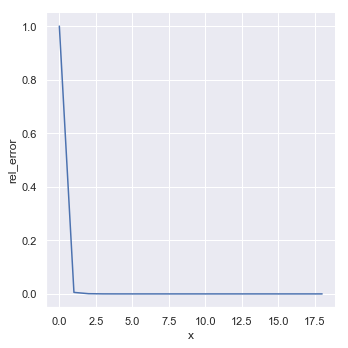

In [6]:
# 绘制相对误差
df = pd.DataFrame(dict(x=np.arange(len(rel_error)), rel_error=rel_error))
sns.set(color_codes=True)
sns.relplot(x='x',y='rel_error',kind='line',data=df)